In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load images
rgb_image = cv2.imread("../data/train/rgb/B_25f56695.png")
depth_image = cv2.imread(
    "../data/train/depth/B_25f56695_depth.png")

In [3]:
# Check if images are loaded correctly
if rgb_image is None or depth_image is None:
    print("Error loading images")
    exit()

(2160, 3840, 3) (2160, 3840, 3)


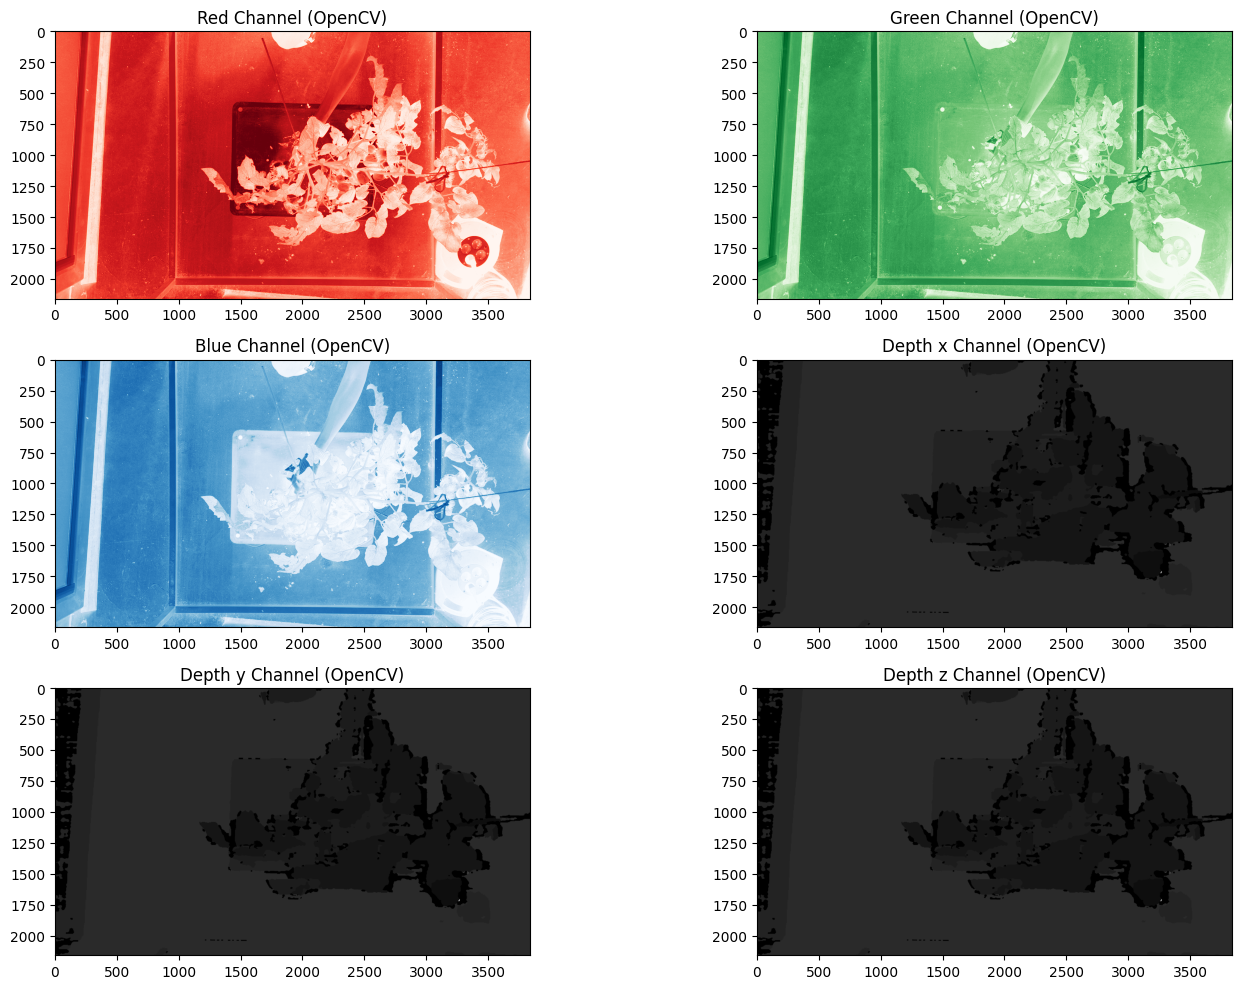

In [4]:
print(rgb_image.shape, depth_image.shape)

# Split the RGB image into its channels
b_channel, g_channel, r_channel = cv2.split(rgb_image)

# Split the depth image into its channels
xx_channel, yy_channel, zz_channel = cv2.split(depth_image)


# Display the individual channels using OpenCV
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.imshow(r_channel, cmap="Reds")
plt.title("Red Channel (OpenCV)")

plt.subplot(3, 2, 2)
plt.imshow(g_channel, cmap="Greens")
plt.title("Green Channel (OpenCV)")

plt.subplot(3, 2, 3)
plt.imshow(b_channel, cmap="Blues")
plt.title("Blue Channel (OpenCV)")

plt.subplot(3, 2, 4)
plt.imshow(xx_channel, cmap="gray")
plt.title("Depth x Channel (OpenCV)")

plt.subplot(3, 2, 5)
plt.imshow(yy_channel, cmap="gray")
plt.title("Depth y Channel (OpenCV)")

plt.subplot(3, 2, 6)
plt.imshow(zz_channel, cmap="gray")
plt.title("Depth z Channel (OpenCV)")

plt.tight_layout()
plt.show()

In [5]:
# Compare the depth channels
channels_equal = np.array_equal(xx_channel, yy_channel) and np.array_equal(
    yy_channel, zz_channel) and np.array_equal(xx_channel, zz_channel)

# Print the comparison result
print(f"Are all depth channels equal? {channels_equal}")

Are all depth channels equal? True


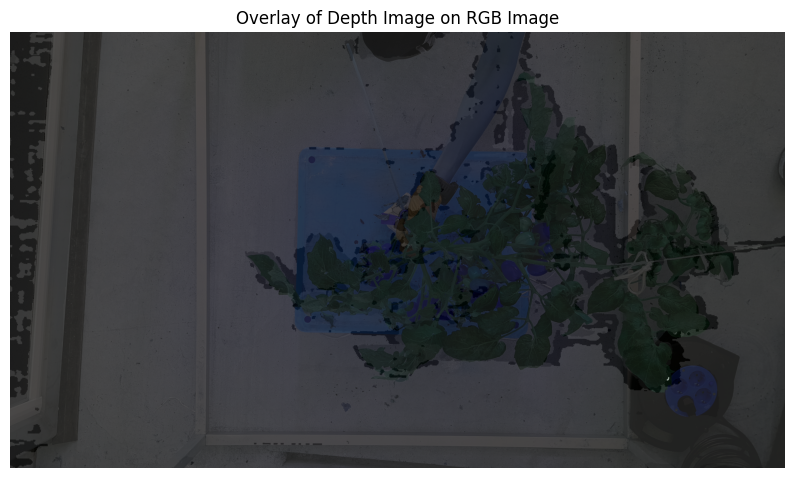

In [6]:
# Convert depth image to single channel
depth_array_single_channel = depth_image[
    :, :, 0
]  # Assuming depth info is in the first channel

# Normalize the depth image to range [0, 255] for better visualization
depth_array_normalized = (
    depth_array_single_channel / depth_array_single_channel.max() * 255
).astype(np.uint8)

# Convert normalized depth image to 3 channels
depth_array_rgb = np.stack((depth_array_normalized,) * 3, axis=-1)

# Overlay depth image on RGB image with some transparency for better visualization
overlay_image = rgb_image[:, :, :3].copy()  # Use only the RGB channels
alpha = 0.2
overlay_image = (alpha * overlay_image + (1 - alpha) * depth_array_rgb).astype(np.uint8)

# Display the overlay
plt.figure(figsize=(10, 10))
plt.imshow(overlay_image)
plt.title("Overlay of Depth Image on RGB Image")
plt.axis("off")
plt.show()

In [7]:
# Concatenate the depth channel with the RGB channels to create a 4-channel image
# We'll use the normalized depth channel
depth_channel = depth_array_normalized[
    :, :, np.newaxis
]  # Add a new axis to match the RGB channels

# Concatenate along the last axis
rgb_d_image = np.concatenate((rgb_image[:, :, :3], depth_channel), axis=-1)


# Save the visualized result
output_image_path = "../results/B_25f56695_rgbd_output.png"
cv2.imwrite(output_image_path, rgb_d_image)

# Display the shape of the resulting 4-channel image
rgb_d_image.shape

(2160, 3840, 4)

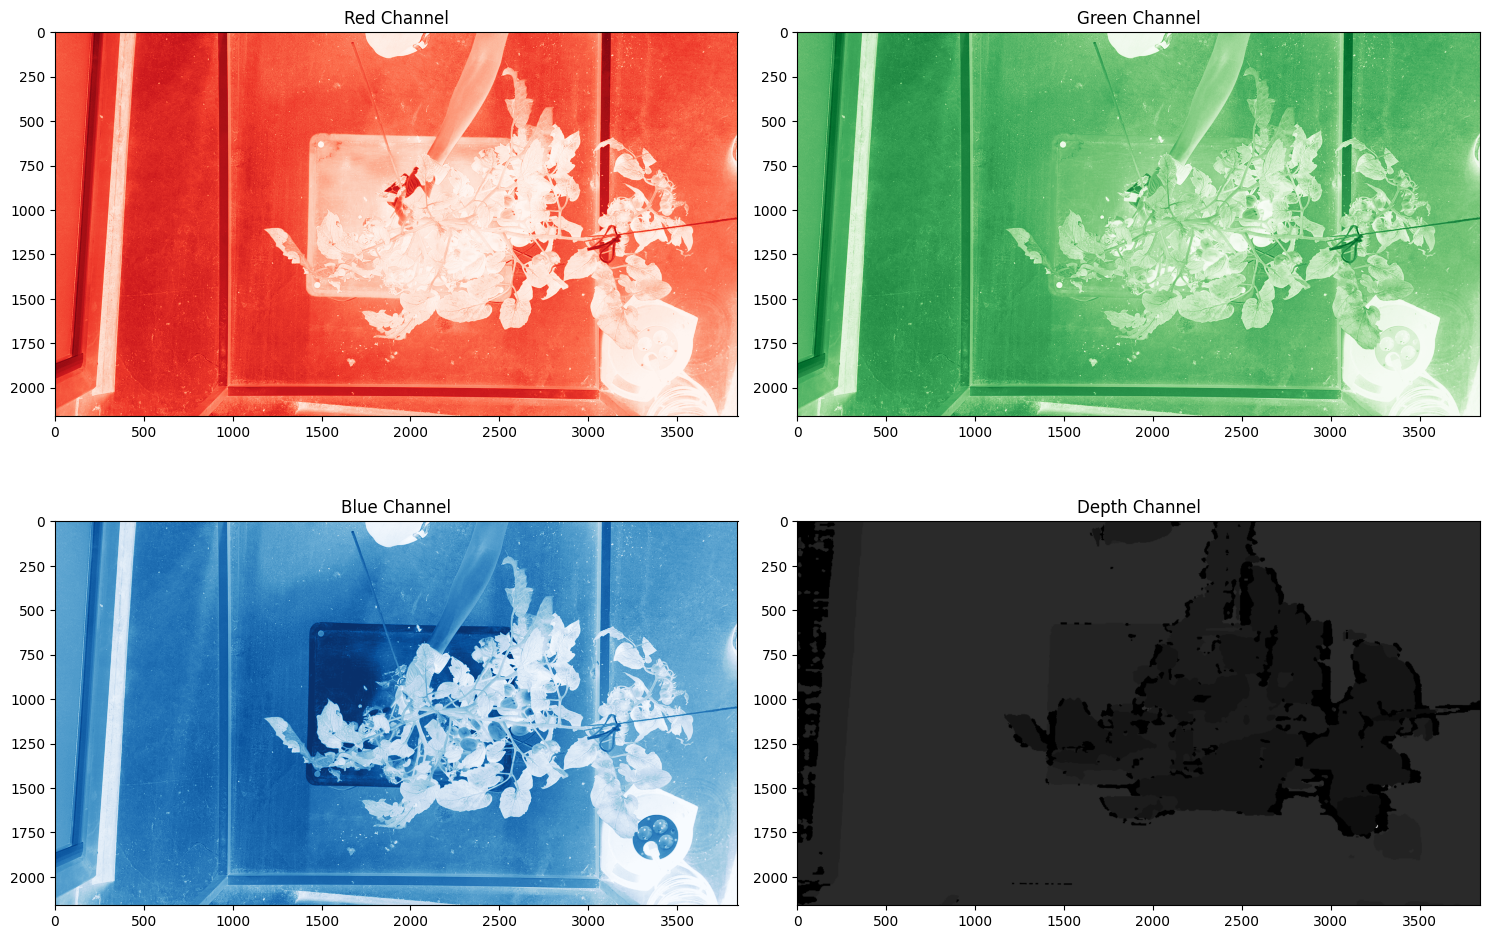

In [8]:
# Extract individual channels from the synthetic RGB+D image 
r_channel = rgb_d_image[:, :, 0]
g_channel = rgb_d_image[:, :, 1]
b_channel = rgb_d_image[:, :, 2]
d_channel = rgb_d_image[:, :, 3]

# Display the individual channels
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(r_channel, cmap="Reds")
plt.title("Red Channel")

plt.subplot(2, 2, 2)
plt.imshow(g_channel, cmap="Greens")
plt.title("Green Channel")

plt.subplot(2, 2, 3)
plt.imshow(b_channel, cmap="Blues")
plt.title("Blue Channel")

plt.subplot(2, 2, 4)
plt.imshow(d_channel, cmap="gray")
plt.title("Depth Channel")

plt.tight_layout()
plt.show()